In [19]:
require("Hmisc")
require("dplyr")
require("profvis")
require("R.utils")
require("Biostrings")
require("data.table")
require("ggplot2")

`summarise()` has grouped output by 'sample_id', 'TLEN'. You can override using the `.groups` argument.


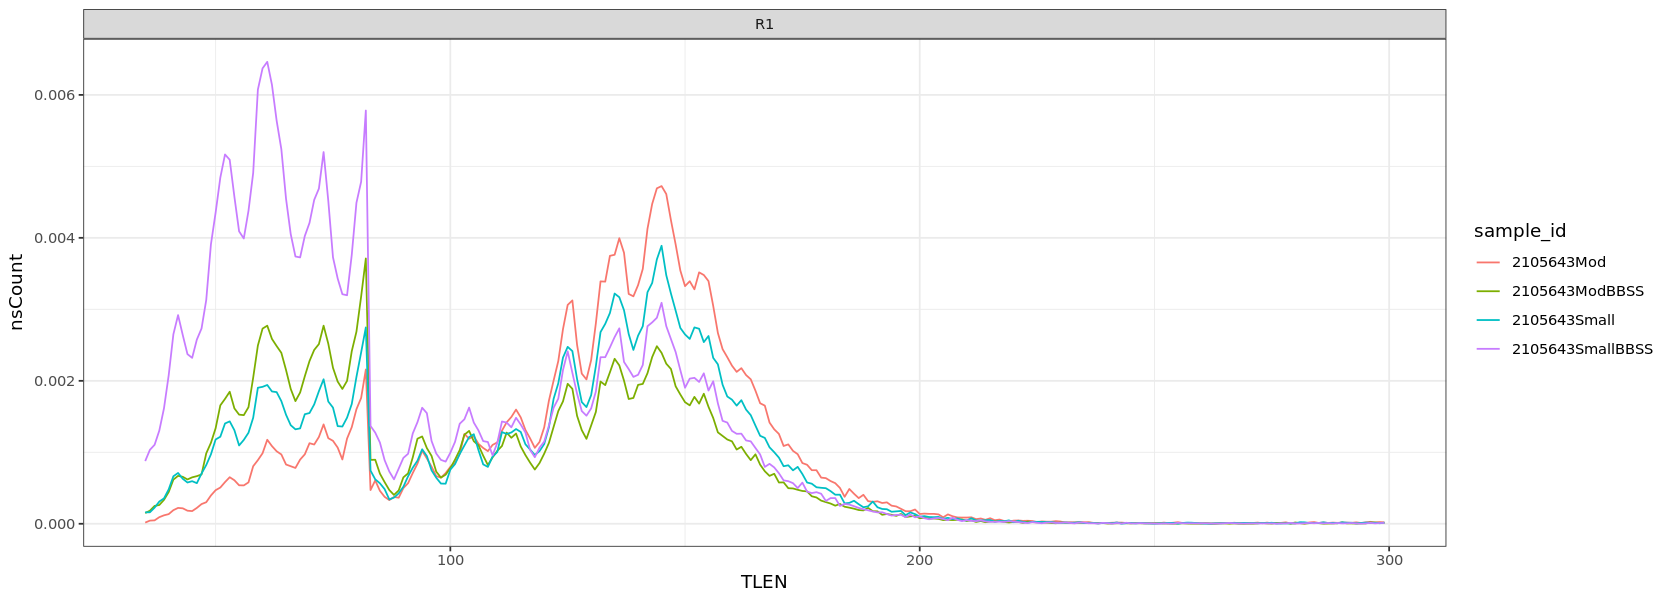

In [21]:
foal_nonMT_IS_meta <- fread(file = "../../output/04_fragmentomics/library_prep_comparison_EquCabAll_nonMT_IS_meta.csv") %>% as.data.frame() %>% 
    mutate(across(-c(TLEN, Count), ~ as.factor(.)))

options(repr.plot.width=14, repr.plot.height=5)
foal_nonMT_IS_meta %>% 
    mutate(TLEN = abs(TLEN)) %>% 
    filter(TLEN < 300) %>% 
    mutate(read = substring(side, 0, 2)) %>% 
    filter(read == "R1") %>% 
    group_by(sample_id, TLEN, read) %>%
    summarise(sCount = sum(Count, na.rm = TRUE)) %>%     
    group_by(read) %>% 
    mutate(nsCount = sCount/sum(sCount)) %>% 
    ggplot(aes(x = TLEN, y = nsCount, col = sample_id)) + 
        geom_line() + facet_grid(cols = vars(read)) + theme_bw() 